# Modelo Predictivo de diabetes
##Objetivo: Permitir conocer si una persona es diabético, pre-diabético o no diabético
###Información sobre las variables:
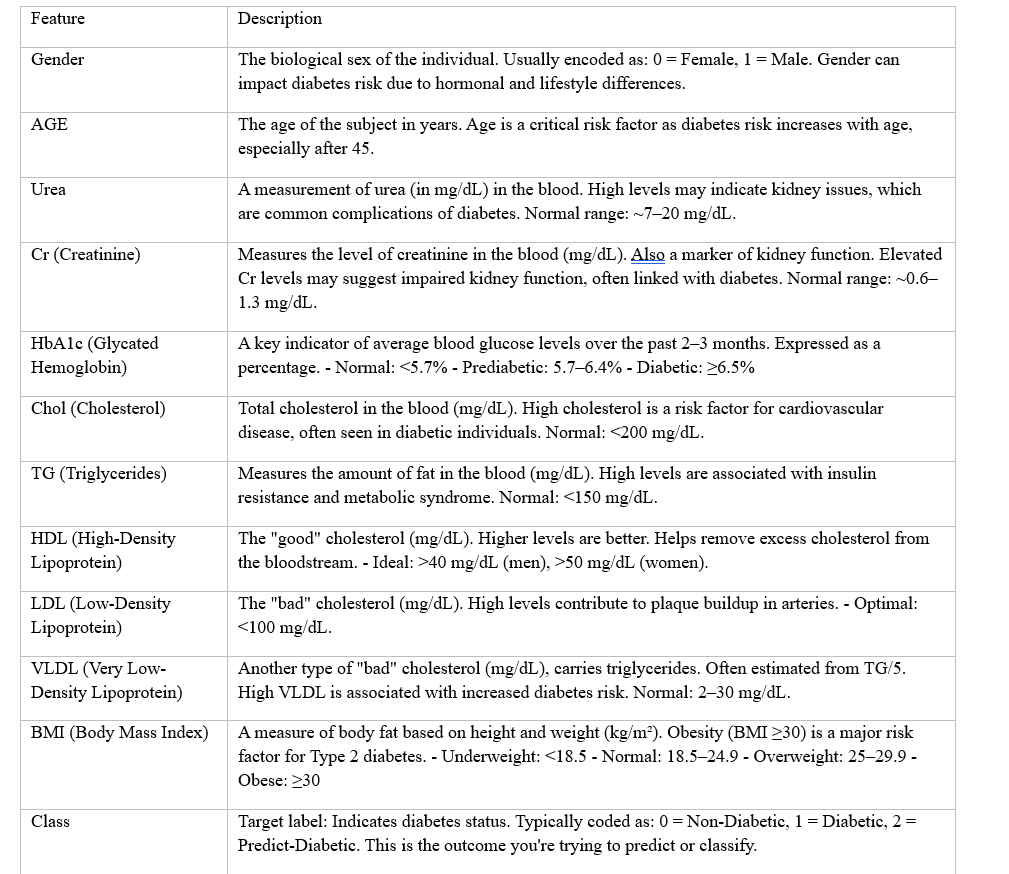

Presentado por: Johan Choles e Iván Tang Zhu

In [ ]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

In [ ]:
#Cargamos los datos
data = pd.read_csv("diabetes_preparados.csv")
data.head()

,Unnamed: 0,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,VLDL,BMI,Class
0,0,0,50,4.7,46,4.9,4.2,0.9,0.5,24.0,0
1,1,1,26,4.5,62,4.9,3.7,1.4,0.6,23.0,0
2,2,1,33,7.1,46,4.9,4.9,1.0,0.4,21.0,0
3,3,0,45,2.3,24,4.0,2.9,1.0,0.4,21.0,0
4,4,0,50,2.0,50,4.0,3.6,1.3,0.6,24.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  288 non-null    int64  
 1   Gender      288 non-null    int64  
 2   AGE         288 non-null    int64  
 3   Urea        288 non-null    float64
 4   Cr          288 non-null    int64  
 5   HbA1c       288 non-null    float64
 6   Chol        288 non-null    float64
 7   TG          288 non-null    float64
 8   VLDL        288 non-null    float64
 9   BMI         288 non-null    float64
 10  Class       288 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 24.9 KB


In [ ]:
data = data.drop('Unnamed: 0',axis=1)
data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,0.6,23.0,0
2,1,33,7.1,46,4.9,4.9,1.0,0.4,21.0,0
3,0,45,2.3,24,4.0,2.9,1.0,0.4,21.0,0
4,0,50,2.0,50,4.0,3.6,1.3,0.6,24.0,0


In [ ]:
#Corrección de variables categóricas
data['Gender']=data['Gender'].astype('category')
data['Class']=data['Class'].astype('category')

##División de datos 70-30

In [ ]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("Class", axis = 1) # Variables predictoras
Y = data['Class'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado

In [ ]:
#Medida de evaluación del mejor modelo
medidas= pd.DataFrame(index=['f1 de la CV'])

##Árbol con validación cruzada

In [ ]:
#Creación del modelo con el conjunto de entrenamiento
from sklearn.tree import DecisionTreeClassifier #DecisionTreeRegressor

modelTree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, max_depth=None) #gini, entropy GINI--> cuantas veces me estoy equivocando

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate

#Definimos la divisón del dataset
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#Realizamos la validacion cruzda
scores = cross_validate(
    modelTree,
    X_train,
    Y_train,
    cv=kf,
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc_ovr'],
    return_train_score=False
)


In [ ]:
resultados = pd.DataFrame(scores)
print(resultados)

# Calcular los promedios de cada métrica
promedios = resultados.mean()
print("\n--- Promedio de métricas ---")
print(promedios)

   fit_time  score_time  test_accuracy  test_precision_macro  \
0  0.006257    0.023893       0.952381              0.966667   
1  0.004322    0.017553       1.000000              1.000000   
2  0.003942    0.017970       0.950000              0.944444   
3  0.004927    0.022371       1.000000              1.000000   
4  0.004526    0.017709       0.950000              0.966667   
5  0.003785    0.016664       1.000000              1.000000   
6  0.003823    0.016891       0.950000              0.958333   
7  0.004129    0.016837       1.000000              1.000000   
8  0.003951    0.017106       0.900000              0.896296   
9  0.004002    0.016935       0.850000              0.844048   

   test_recall_macro  test_f1_macro  test_roc_auc_ovr  
0           0.952381       0.956815          1.000000  
1           1.000000       1.000000          1.000000  
2           0.962963       0.950089          1.000000  
3           1.000000       1.000000          1.000000  
4           0.9

In [ ]:
medidas['Tree'] = promedios.loc['test_f1_macro']
medidas

,Tree
f1 de la CV,0.956662


In [ ]:
# Entrenar el modelo completo con todos los datos
modelTree.fit(X, Y)

DecisionTreeClassifier(min_samples_leaf=2)

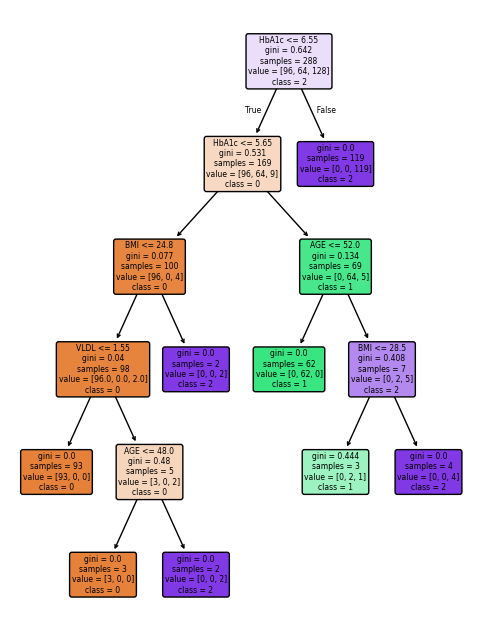

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(6,8)) #Tamaño de la imagen
plot_tree(modelTree, feature_names=X.columns.values, class_names=[str(c) for c in modelTree.classes_], rounded=True, filled=True)
plt.show()

Conclusión: Se puede observar que el modelo tuvo un rendimiento en la media armónica en la validación cruzada de 0.955176. Al momento del entrenamiento le va un poquito mejor al tener todos los datos. La característica mas importante para predecir la diabetes es HbA1c, permitiendo saber si 119 registros son de clase 2 enseguida; como segundas importantes: la edad y BMI.
Para la raíz la principal regla de desición es que si HbA1c menor o igual 6.55.
El arbol tiene una profundidad de 5 niveles.

##Random Forest

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf= RandomForestClassifier(n_estimators=100,  max_samples=0.7, criterion='gini',
                              max_depth=None, min_samples_leaf=2)

In [ ]:
#Definimos la divisón del dataset
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#Realizamos la validacion cruzda
scores = cross_validate(
    model_rf,
    X_train,
    Y_train,
    cv=kf,
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc_ovr'],
    return_train_score=False
)

In [ ]:
resultados = pd.DataFrame(scores)
print(resultados)

# Calcular los promedios de cada métrica
promedios = resultados.mean()
print("\n--- Promedio de métricas ---")
print(promedios)

   fit_time  score_time  test_accuracy  test_precision_macro  \
0  0.185518    0.032125           1.00              1.000000   
1  0.175060    0.030480           0.90              0.896296   
2  0.168230    0.030203           1.00              1.000000   
3  0.175714    0.030217           1.00              1.000000   
4  0.169215    0.059255           0.95              0.933333   
5  0.172107    0.030583           1.00              1.000000   
6  0.170290    0.030819           0.95              0.958333   
7  0.169013    0.030129           0.95              0.966667   
8  0.174524    0.030672           1.00              1.000000   
9  0.164956    0.033581           0.95              0.958333   

   test_recall_macro  test_f1_macro  test_roc_auc_ovr  
0           1.000000       1.000000          1.000000  
1           0.896296       0.896296          0.984377  
2           1.000000       1.000000          1.000000  
3           1.000000       1.000000          1.000000  
4           0.9

In [ ]:
medidas['RandomForest'] = promedios.loc['test_f1_macro']
medidas

,Tree,RandomForest
f1 de la CV,0.956662,0.968821


In [ ]:
model_rf.fit(X,Y)

RandomForestClassifier(max_samples=0.7, min_samples_leaf=2)

In [ ]:
import pickle
filename = 'modelo-class.pkl'
variables= X.columns._values
pickle.dump([modelTree,model_rf,modelKNN, red_neuronal, modelSVM,variables,min_max_scaler], open(filename, 'wb'))
#pickle permite guardar modelos

Conclusión: Se puede observar que el modelo tuvo un rendimiento en la media armónica en la validación cruzada de 0.983542. Este modelo tuvo un excelente rendimiento. Conociendo de que va el problema sabemos que es un problema sencillo, razón por la cual al modelo del arbol le fue bien, y por consecuente, a este le iría mucho mejor. El modelo tuvo un mejor rendimiento que el arbol de clasficacion ya que eventualmente lo que usa este modelo son puros arboles de clasificacion.

##KNN con validación cruzada


In [ ]:
from sklearn.preprocessing import MinMaxScaler

cols_numericas = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'VLDL', 'BMI']

# Normalizamos las variables numéricas
min_max_scaler = MinMaxScaler()
X_train[cols_numericas] = min_max_scaler.fit_transform(X_train[cols_numericas])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier(n_neighbors=1, metric='euclidean')

# Validación cruzada
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores_knn = cross_validate(
    modelKNN,
    X_train,
    Y_train,
    cv=kf,
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
    return_train_score=False
)

# Mostrar resultados
import pandas as pd
resultados_knn = pd.DataFrame(scores_knn)
print(resultados_knn)
print("\n--- Promedio de métricas ---")
print(resultados_knn.mean())

   fit_time  score_time  test_accuracy  test_precision_macro  \
0  0.007108    0.022656       0.761905              0.739394   
1  0.004958    0.013806       0.850000              0.877778   
2  0.005950    0.014245       0.850000              0.875000   
3  0.003784    0.013414       0.900000              0.904762   
4  0.003604    0.013667       0.800000              0.809524   
5  0.003699    0.013839       0.900000              0.869048   
6  0.003810    0.013579       0.950000              0.933333   
7  0.003648    0.013454       1.000000              1.000000   
8  0.003416    0.012928       0.900000              0.888889   
9  0.003638    0.013194       0.850000              0.875000   

   test_recall_macro  test_f1_macro  
0           0.723810       0.722222  
1           0.840741       0.854776  
2           0.851852       0.836802  
3           0.907407       0.894534  
4           0.841270       0.794805  
5           0.869048       0.869048  
6           0.962963       0.

In [ ]:
medidas['Knn'] = resultados_knn.mean().loc['test_f1_macro']
medidas

,Tree,RandomForest,Knn
f1 de la CV,0.956662,0.968821,0.864893


In [ ]:
# Entrenar el modelo completo con todos los datos
modelKNN.fit(X, Y)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

Conclusión: Se puede observar que el modelo tuvo un rendimiento en la media armónica en la validación cruzada de 0.867383. Al momento del entrenamiento le va un poquito mejor al tener todos los datos.
NO le fue mejor que el anterior modelo. Esto indica que no pudo identificar adecuamente con los vecinos mas cercanos. Posiblemente le hizo falta un numero de vecinos mayor a 1.

##Red Neuronal con validación cruzada

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
red_neuronal = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(6),
    learning_rate='constant',
    learning_rate_init=0.1,
    momentum=0.2,
    max_iter=500,
    random_state=3
)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
#Validacion cruazada
scores = cross_validate(
    red_neuronal,
    X_train,
    Y_train,
    cv=kfold,
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
    return_train_score=False
  )

resultados = pd.DataFrame(scores)
print(resultados)
print("\n--- Promedio de métricas ---")
print(resultados.mean())

   fit_time  score_time  test_accuracy  test_precision_macro  \
0  0.067625    0.012504       0.952381              0.944444   
1  0.063996    0.012138       0.700000              0.705128   
2  0.153868    0.013933       0.950000              0.944444   
3  0.053863    0.011238       0.950000              0.952381   
4  0.065017    0.011493       0.900000              0.888889   
5  0.171805    0.011646       0.950000              0.933333   
6  0.056269    0.011216       0.950000              0.958333   
7  0.179071    0.012224       0.950000              0.966667   
8  0.062527    0.011603       0.850000              0.833333   
9  0.152164    0.012749       0.900000              0.902778   

   test_recall_macro  test_f1_macro  
0           0.952381       0.944056  
1           0.640741       0.640693  
2           0.962963       0.950089  
3           0.933333       0.937322  
4           0.915344       0.888084  
5           0.952381       0.937322  
6           0.962963       0.

In [ ]:
medidas['NN'] = resultados.mean().loc['test_f1_macro']
medidas

,Tree,RandomForest,Knn,NN
f1 de la CV,0.956662,0.968821,0.864893,0.890622


In [ ]:
red_neuronal.fit(X, Y)

MLPClassifier(hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=500,
              momentum=0.2, random_state=3)

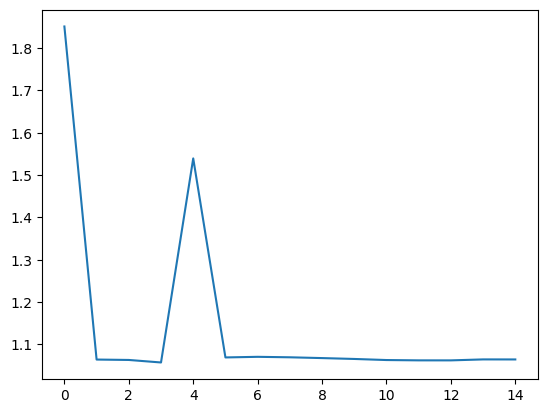

In [ ]:
loss_values = red_neuronal.loss_curve_
plt.plot(loss_values)

Conclusión: Se puede observar que el modelo tuvo un rendimiento en la media armónica en la validación cruzada de 0.886463. Al momento del entrenamiento le va un poquito mejor al tener todos los datos. A este modelo le fue solo un poquito mejor que el anterior. Si revisamos la curva de perdida observamos que efectivamente si hay una tendencia de reduccion, a pesar de que haya picos, lo cual es normal.
Por entendimiento del problema, no era tan necesario utilizar este modelo para prediccion.

##SVM con validación cruzada

In [ ]:
#SVM
from sklearn.svm import SVC # SVR

In [ ]:
modelSVM = SVC(kernel='poly') #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
#Validacion cruazada
scores = cross_validate(
    modelSVM,
    X_train,
    Y_train,
    cv=kfold,
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
    return_train_score=False
  )

resultados = pd.DataFrame(scores)
print(resultados)
print("\n--- Promedio de métricas ---")
print(resultados.mean())

   fit_time  score_time  test_accuracy  test_precision_macro  \
0  0.006663    0.013754       0.904762              0.925926   
1  0.005279    0.013355       0.750000              0.729762   
2  0.005003    0.012030       0.950000              0.952381   
3  0.005001    0.012081       0.800000              0.771429   
4  0.004894    0.012244       0.750000              0.716667   
5  0.004652    0.011624       0.800000              0.878788   
6  0.005190    0.014331       0.850000              0.900000   
7  0.005130    0.017968       0.950000              0.958333   
8  0.007213    0.013175       0.800000              0.777778   
9  0.004749    0.012589       0.800000              0.805556   

   test_recall_macro  test_f1_macro  
0           0.866667       0.875000  
1           0.737037       0.730920  
2           0.933333       0.937322  
3           0.774074       0.770136  
4           0.711640       0.706481  
5           0.712963       0.706318  
6           0.796296       0.

In [ ]:
medidas['SVM'] = resultados.mean().loc['test_f1_macro']
medidas

,Tree,RandomForest,Knn,NN,SVM
f1 de la CV,0.956662,0.968821,0.864893,0.890622,0.803173


In [ ]:
modelSVM.fit(X, Y)

SVC(kernel='linear')

Conclusión: Se puede observar que el modelo tuvo un rendimiento en la media armónica en la validación cruzada de 0.809442. Al momento del entrenamiento le va un poquito mejor al tener todos los datos. Este fue el peor modelo, segun el f1 en la validacion cruzada. Se observa que es considerablemente menor a los otros ya vistos. Esto es un ejemplo que no hace falta una escopeta para matar una mosquita pequeña. Estos modelos de SVM ofrecen una robustes y gran peso para problemas un poco más complejos.

El modelo que tuvo mejor rendimiento fue: **Random Forest**.

#Hiperparametrización

Usamos **Random Forest**

In [ ]:
#Se desnormaliza X_train
X_train[cols_numericas] = min_max_scaler.inverse_transform(X_train[cols_numericas])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#randomforest
rf = RandomForestClassifier(random_state=42)

# Definir la grilla de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'criterion': ['gini', 'entropy','log_loss'],
    'max_samples': [0.7,0.75,0.8],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Definir la búsqueda
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=10,
    n_jobs=-1,
    verbose=1
)

# Ejecutar la búsqueda
grid_search.fit(X_train, Y_train)

# Resultados
print("Mejor modelo:", grid_search.best_estimator_)
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor f1 promedio:", grid_search.best_score_)


Fitting 10 folds for each of 720 candidates, totalling 7200 fits
Mejor modelo: RandomForestClassifier(max_samples=0.7, min_samples_leaf=2, random_state=42)
Mejores parámetros: {'criterion': 'gini', 'max_depth': None, 'max_samples': 0.7, 'min_samples_leaf': 2, 'n_estimators': 100}
Mejor f1 promedio: 0.9794428481734985


## Sección hiperparametrización de referencia de clase

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_validate
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd


base_tree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, max_depth=None)

base_nn1 = MLPClassifier(
    activation="logistic",
    hidden_layer_sizes=(10,),
    learning_rate='adaptive',
    learning_rate_init=0.2,
    momentum=0.3,
    max_iter=500,
    verbose=False
)

base_nn2 = MLPClassifier(
    activation="relu",
    hidden_layer_sizes=(4,),
    learning_rate='adaptive',
    learning_rate_init=0.2,
    momentum=0.3,
    max_iter=100,
    verbose=False
)


model_bag = BaggingClassifier()


param_grid = {
    'estimator': [base_tree, base_nn1, base_nn2],
    'n_estimators': [10, 50, 100],
    'max_samples': [0.6, 0.7, 0.8]
}

#hiperparaetrizacion
grid = GridSearchCV(
    estimator=model_bag,
    param_grid=param_grid,
    scoring='f1_macro',
    n_jobs=-1,
    cv=3
)
grid.fit(X, Y)   # entrenamos con todos los datos (ya tiene CV interna)


best_model = grid.best_estimator_
print("🔹 Mejores parámetros encontrados:\n", grid.best_params_)
print("\n🔹 Mejor F1-macro promedio (CV interna):", grid.best_score_)


# validacion cruzada extnerna
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro'
}

scores = cross_validate(best_model, X, Y, cv=kf, scoring=scoring, return_train_score=False)

resultados = pd.DataFrame(scores)
print("\n--- Resultados por fold ---")
print(resultados)

#promedio final
promedios = resultados.mean()
print("\n--- Promedio de métricas (validación cruzada externa) ---")
print(promedios[['test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_macro']])


🔹 Mejores parámetros encontrados:
 {'estimator': DecisionTreeClassifier(min_samples_leaf=2), 'max_samples': 0.6, 'n_estimators': 10}

🔹 Mejor F1-macro promedio (CV interna): 0.9685083630378898

--- Resultados por fold ---
   fit_time  score_time  test_accuracy  test_precision_macro  \
0  0.048106    0.028269       1.000000              1.000000   
1  0.044152    0.019377       0.965517              0.969697   
2  0.040538    0.017265       0.965517              0.969697   
3  0.039933    0.016432       0.965517              0.969697   
4  0.040356    0.016590       0.965517              0.952381   
5  0.038882    0.017190       1.000000              1.000000   
6  0.040247    0.017130       0.931034              0.925926   
7  0.178929    0.018022       0.965517              0.976190   
8  0.040565    0.016789       0.964286              0.966667   
9  0.040879    0.016306       1.000000              1.000000   

   test_recall_macro  test_f1_macro  
0           1.000000       1.000000

##Modelo definitivo RandomForest

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf= RandomForestClassifier(n_estimators=100,  max_samples=0.7, criterion='gini',
                              max_depth=None, min_samples_leaf=2)
model_rf.fit(X_train, Y_train)

RandomForestClassifier(max_samples=0.7, min_samples_leaf=2)

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        29
           2       1.00      1.00      1.00        19
           0       1.00      0.95      0.97        39

    accuracy                           0.98        87
   macro avg       0.98      0.98      0.98        87
weighted avg       0.98      0.98      0.98        87



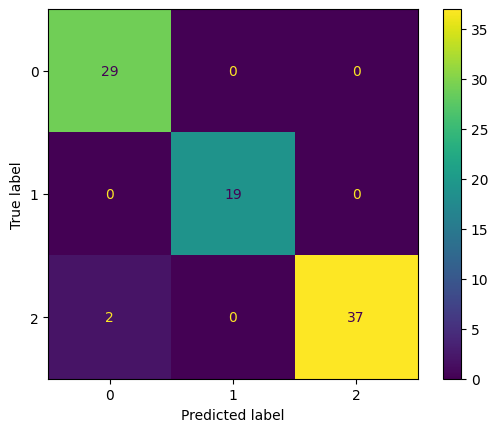

In [ ]:
#Evaluación del mejor Tree con el 30% (X_test sin normalizar)
from sklearn import metrics

Y_pred = model_rf.predict(X_test) #30%

#Matriz de confusion
cm=metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Y_test.unique())
disp.plot()

#Precision, Recall, f1, exactitud
print(metrics.classification_report( y_true=Y_test, y_pred=Y_pred, target_names=['1','2','0']))

In [ ]:
import pickle
filename = 'modelo-class.pkl'
variables= X.columns._values
pickle.dump([model_rf,variables,min_max_scaler], open(filename, 'wb'))
#pickle permite guardar modelos